In [2]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import plumed
import nglview
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io import *
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate
from ase.io.proteindatabank import read_proteindatabank
from ase.io.lammpsdata import write_lammps_data

/home/ahlawat/.local/lib/python3.9/site-packages/ase/utils/geometry.py:8: UserWarning: Moved to ase.geometry and ase.build
  warnings.warn('Moved to ase.geometry and ase.build')
/home/ahlawat/.local/lib/python3.9/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')
/home/ahlawat/.local/lib/python3.9/site-packages/ase/lattice/surface.py:17: UserWarning: Moved to ase.build
  warnings.warn('Moved to ase.build')


In [ ]:
structure = io.read('cubic.cif')
structure = sort(structure)
structure = structure.repeat((1,1,1))
structure = sort(structure)
view(structure)
write_vasp('cubic_unit_cell.vasp', structure, vasp5=True, direct=True)

In [ ]:
! rm *.vasp

## cubic 3C polymorph: http://dx.doi.org/10.1016/j.jpcs.2008.05.007
- Experimental data
   - ICSD 161481
   - ICSD Structure : Cs I3 Pb
   - Space Group: P m 3 m (221)
   - Cell: a 6.2894Å b 6.2894Å c 6.2894Å, α 90° β 90° γ 90° 

In [ ]:
structure = io.read('cubic.cif')
structure = sort(structure)
structure = structure.repeat((2,1,2))
structure = sort(structure)
view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")
structure

## prepare vasp/quantum espresso input file

In [ ]:
write_vasp('cubic.vasp', structure, vasp5=True, direct=True)

# inp_data={'prefix':"cubic",
#           'electron_maxstep':1000,
#           'outdir':"./",    -65.07439064
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':70.,
#           'occupations':'fixed',
#           'ecutrho':700.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"Cs":"Cs.pbe-spn-rrkjus_psl.1.0.0.UPF",       
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("cubic_cspbi3.pwi", 
#          structure, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(2, 4, 2),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)


# k-points vs energy

In [ ]:
# final_e = [ -378.36256991, -378.09603049,  -378.16345971,  -378.14942638, -378.15382279, -378.15239590] 

# k_points = [1,2,3,4,5,6]

# fig, (ax) = plt.subplots(figsize=(6,6))

# ax.plot(k_points,final_e, color='magenta', ls='--', lw=2, markersize=10, marker='h')
# ax.set_xlabel('K-points', fontsize = 14)
# ax.set_ylabel('Total energy (Ry)', fontsize = 14)
# ax.tick_params(labelsize=12)
# ax.set_title('K-points vs Total energy, wfc=70 Ry', fontsize=15)

## wavefunction_cutoff tests  
  - improvement need to remove '' in numbers

In [ ]:
# structure = io.read('cubic.cif')
# structure = sort(structure)
# view(structure)
# import os
# newpath = r'./wfc_cutoff_test' 
# if not os.path.exists(newpath):
#     os.makedirs(newpath)
#     os.chdir(newpath)
    
# wf_cutoff = np.arange(20,140,10)

# for wfc in wf_cutoff:
#     rho_cut = wfc*10
#     inp_data={'prefix':"cubic-%d" %wfc, 
#               'electron_maxstep':1000,
#               'outdir':"./",    
#               'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#               'calculation':'relax',
#               'vdw_corr':'grimme-d3',
#               'ecutwfc': "%d" %wfc,
#               'occupations':'fixed',
#               'ecutrho':"%d" %rho_cut, 
#               'conv_thr':1e-8,
#               'electron_maxstep':500,
#               'ion_dynamics':'bfgs',
#               'cell_dynamics':'bfgs'}

#     pseudos={"Cs":"Cs.pbe-spn-rrkjus_psl.1.0.0.UPF",       
#               "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#               "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

#     io.write("cubic_cspbi3_%d.pwi" %wfc,
#               structure, 
#               input_data=inp_data,
#               pseudopotentials=pseudos, 
#               kpts=(2, 2, 2),
#               koffset=(0, 0, 0), 
#               crystal_coordinates=False)
# os.chdir("..")

In [ ]:
# final_e = [-378.06226432, -378.13984078, -378.14754140, -378.14812932, -378.14844286, -378.14925605,
#            -378.14942638, -378.14955884, -378.14969021, -378.14971276, -378.14974328, -378.14978518] 

# wfc = [ 20,  30,  40,  45,  50,  60,  70,  80,  90, 100, 110, 120]

# fig, (ax) = plt.subplots(figsize=(6,6))

# ax.plot(wfc,final_e, color='navy', ls='--', lw=2, markersize=10, marker='h')
# ax.set_xlabel('Wavefunction cutoff (Ry)', fontsize = 14)
# ax.set_ylabel('Total energy (Ry)', fontsize = 14)
# ax.tick_params(labelsize=12)
# ax.set_title('Wavefunction cutoff vs Total energy', fontsize=15)

## tetragonal polymorph:  https://dx.doi.org/10.25505/fiz.icsd.cc20vqj4
- Experimental data
  - Space Group: P 4/m b m (127)
  - Cell: a 8.82690(3)Å b 8.82690(3)Å c 6.29902(3)Å, α 90° β 90° γ 90° 

In [ ]:
structure = io.read('beta.cif')
structure = sort(structure)
structure = structure.repeat((1,1,2))
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")
structure

### prepare vasp/quantum espresso input file

In [ ]:
write_vasp('tetragonal.vasp', structure, vasp5=True, direct=True)

# inp_data={'prefix':"tetragonal",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':70.,
#           'occupations':'fixed',
#           'ecutrho':700.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"Cs":"Cs.pbe-spn-rrkjus_psl.1.0.0.UPF",       
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("tetragonal_cspbi3.pwi", 
#          structure, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(3, 3, 2),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)

## orthorhombic polymorph: http://dx.doi.org/10.1021/acsenergylett.8b00672
- Experimental data
  - ICSD 264725 
  - ICSD Structure : (Cs I3 Pb)n
  - Space Group: P n a m (62)
  - Cell: a 8.8561(4)Å b 8.5766(3)Å c 12.4722(6)Å, α 90° β 90° γ 90° 

In [ ]:
structure = io.read('ortho.cif')
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")
structure

### prepare vasp/quantum espresso input file

In [ ]:
write_vasp('ortho.vasp', structure, vasp5=True, direct=True)

# inp_data={'prefix':"orthorhombic",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':70.,
#           'occupations':'fixed',
#           'ecutrho':700.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"Cs":"Cs.pbe-spn-rrkjus_psl.1.0.0.UPF",       
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("ortho_cspbi3.pwi", 
#          structure, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(3, 3, 2),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)




## hexagonal polymorph: https://dx.doi.org/10.5517/cc11hdmk
- Experimental data
  - Crystal details
  - Space group 	P n m a (62)
  - Unit cell 	a 10.4342(7)Å b 4.7905(3)Å c 17.7610(10)Å
  - α 90.00° β 90.00° γ 90.00°
  - Cell volume 	887.78
  - Reduced cell 	a 4.791Å b 10.434Å c 17.761Å
  - α 90.000° β 90.000° γ 90.000°
  - Polymorph 	delta polymorph
  - Colour 	yellow


In [ ]:
structure = io.read('delta.cif')
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

structure
#fig.savefig("ase_slab.png")

### prepare vasp/quantum espresso input file

In [ ]:
write_vasp('delta.vasp', structure, vasp5=True, direct=True)

# inp_data={'prefix':"hexagonal",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':70.,
#           'occupations':'fixed',
#           'ecutrho':700.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"Cs":"Cs.pbe-spn-rrkjus_psl.1.0.0.UPF",       
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("hexagonal_cspbi3.pwi", 
#          structure, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(2, 6, 1),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)



# hexagonal phase from FAPbI3

Text(0, 0.5, 'y[$\\AA$]')

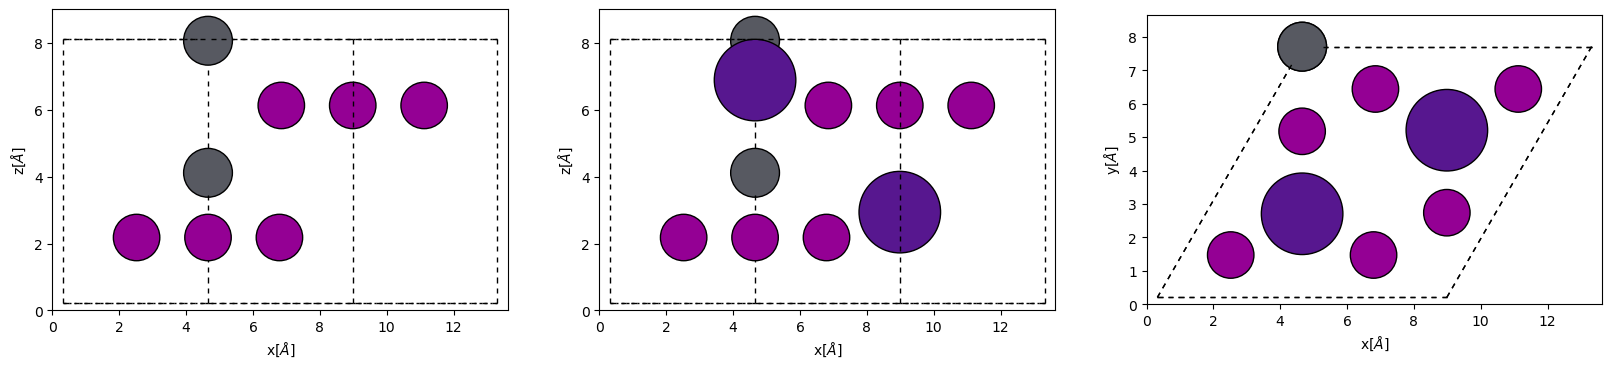

In [6]:
structure = io.read('hexagonal_FAPI.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
N_index = []
flag = False

while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('Cs.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1
    
k = 0
while k < num_atoms:
    if(structure.get_chemical_symbols()[k] == 'N'):
        del_index.append(k)
    k = k + 1

del structure[del_index]  


FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

final_structure = FA_replaced_structure.repeat((1,1,2))
final_structure = sort(final_structure)
view(final_structure)

write_vasp('hexa_FAPI.vasp', final_structure, vasp5=True, direct=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)

# force fields simulations:
  - force fields are taken from : Bischak, Connor G., et al. "Liquid-like interfaces mediate structural phase transitions in lead halide perovskites." Matter 3.2 (2020): 534-545.

# cubic-phase

In [2]:
unit_cell = io.read('cubic.cif')
rep1 = 2
rep2 = 1
rep3 = 2

supercell = unit_cell.repeat((rep1,rep2,rep3))
supercell = sort(supercell)

# set point charges
i = 0
num_atoms = len(supercell.get_chemical_symbols())
charge_array = [0]*num_atoms
while i < num_atoms:
    if(supercell.get_chemical_symbols()[i] == 'Cs'):
        charge_array[i]= 0.86
    if(supercell.get_chemical_symbols()[i] == 'I'):
        charge_array[i]= -0.57
    if(supercell.get_chemical_symbols()[i] == 'Pb'):
        charge_array[i]= 0.85
    i = i + 1

supercell.set_initial_charges(charges=charge_array)
view(supercell)
print(supercell) 


write_lammps_data('data.CPI', supercell, atom_style = 'full', force_skew=True, units='real')

with open("start.lmp","w") as f:
    print("""
###
dimension       3
boundary        p p p
units           metal
atom_style      full
variable        seed world 1428
variable        freq equal 500
read_data       data.CPI
mass            1 132.904999 # Cs
mass            2 126.900002 # I
mass            3 204.199997 # Pb
pair_style      lj/cut/coul/long 8.0 10.0
pair_modify     mix arithmetic
neigh_modify    every 1
kspace_style    pppm 1e-4
dielectric 1.0
variable ACs  equal "0.07728"
variable rCs  equal "3.584"
variable APb  equal "0.001086"
variable rPb  equal "3.210"
variable AI   equal "0.06389"
variable rI   equal "4.014"
pair_coeff      1 1 ${ACs}    ${rCs}
pair_coeff      2 2 ${AI}     ${rI}
pair_coeff      3 3 ${APb}    ${rPb}
thermo          ${freq}
thermo_style    custom step temp pe ke etotal press lx ly lz xy xz yz
# Minimization

min_style cg
fix 1 all box/relax aniso 0.0 vmax 0.01
minimize        1.0e-4 1.0e-6 1000 10000
unfix 1
write_data      data.min
""",file=f)

subprocess.run("lmp_mpi < start.lmp ",shell=True)

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'cubic' is not interpreted for space group Spacegroup(221, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='Cs4I12Pb4', pbc=True, cell=[12.5788, 6.2894, 12.5788], initial_charges=..., spacegroup_kinds=...)
LAMMPS (23 Jun 2022)
Reading data file ...
  triclinic box = (0 0 0) to (12.5788 6.2894 12.5788) with tilt (0 0 0)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  20 atoms
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:    0        0        0       
  special bond factors coul:  0        0        0       
     0 = max # of 1-2 neighbors
     0 = max # of 1-3 neighbors
     0 = max # of 1-4 neighbors
     1 = max # of special neighbors
  special bonds CPU = 0.001 seconds
  read_data CPU = 0.003 seconds
PPPM initialization ...
  using 12-bit tables for long-range coulomb (../kspace.cpp:342)
  G vector (1/distance) = 0.27767082
  grid = 8 4 8
  stencil order = 5
  estimated absolute RMS force accuracy = 0.00039700966
  estimated relative force accuracy = 2.7570795e-05
  using double precision KISS FFT
  3d grid and FFT values/proc = 2475 256
Generated 3 of 3

CompletedProcess(args='lmp_mpi < start.lmp ', returncode=0)

# tetragonal-phase

In [3]:
unit_cell = io.read('beta.cif')
rep1 = 1
rep2 = 1
rep3 = 2

supercell = unit_cell.repeat((rep1,rep2,rep3))
supercell = sort(supercell)

# set point charges
i = 0
num_atoms = len(supercell.get_chemical_symbols())
charge_array = [0]*num_atoms
while i < num_atoms:
    if(supercell.get_chemical_symbols()[i] == 'Cs'):
        charge_array[i]= 0.86
    if(supercell.get_chemical_symbols()[i] == 'I'):
        charge_array[i]= -0.57
    if(supercell.get_chemical_symbols()[i] == 'Pb'):
        charge_array[i]= 0.85
    i = i + 1

supercell.set_initial_charges(charges=charge_array)
#view(supercell)
print(supercell) 


write_lammps_data('data.CPI', supercell, atom_style = 'full', force_skew=True, units='real')

with open("start.lmp","w") as f:
    print("""
###
dimension       3
boundary        p p p
units           metal
atom_style      full
variable        seed world 1428
variable        freq equal 500
read_data       data.CPI
mass            1 132.904999 # Cs
mass            2 126.900002 # I
mass            3 204.199997 # Pb
pair_style      lj/cut/coul/long 8.0 10.0
pair_modify     mix arithmetic
neigh_modify    every 1
kspace_style    pppm 1e-4
dielectric 1.0
variable ACs  equal "0.07728"
variable rCs  equal "3.584"
variable APb  equal "0.001086"
variable rPb  equal "3.210"
variable AI   equal "0.06389"
variable rI   equal "4.014"
pair_coeff      1 1 ${ACs}    ${rCs}
pair_coeff      2 2 ${AI}     ${rI}
pair_coeff      3 3 ${APb}    ${rPb}
thermo          ${freq}
thermo_style    custom step temp pe ke etotal press lx ly lz xy xz yz
# Minimization

min_style cg
fix 1 all box/relax aniso 0.0 vmax 0.01
minimize        1.0e-4 1.0e-6 1000 10000
unfix 1
write_data      data.min
""",file=f)

subprocess.run("lmp_mpi < start.lmp ",shell=True)

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(127, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='Cs4I12Pb4', pbc=True, cell=[8.8269, 8.8269, 12.59804], initial_charges=..., spacegroup_kinds=...)
LAMMPS (23 Jun 2022)
Reading data file ...
  triclinic box = (0 0 0) to (8.8269 8.8269 12.59804) with tilt (0 0 0)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  20 atoms
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:    0        0        0       
  special bond factors coul:  0        0        0       
     0 = max # of 1-2 neighbors
     0 = max # of 1-3 neighbors
     0 = max # of 1-4 neighbors
     1 = max # of special neighbors
  special bonds CPU = 0.001 seconds
  read_data CPU = 0.003 seconds
PPPM initialization ...
  using 12-bit tables for long-range coulomb (../kspace.cpp:342)
  G vector (1/distance) = 0.28388955
  grid = 6 6 8
  stencil order = 5
  estimated absolute RMS force accuracy = 0.00027746631
  estimated relative force accuracy = 1.9268969e-05
  using double precision KISS FFT
  3d grid and FFT values/proc = 2535 288
Generated 3 of 3

Abort(1) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 1) - process 0


CompletedProcess(args='lmp_mpi < start.lmp ', returncode=1)

# orthorhombic-phase

In [6]:
unit_cell = io.read('ortho.cif')
rep1 = 1
rep2 = 1
rep3 = 1

supercell = unit_cell.repeat((rep1,rep2,rep3))
supercell = sort(supercell)

# set point charges
i = 0
num_atoms = len(supercell.get_chemical_symbols())
charge_array = [0]*num_atoms
while i < num_atoms:
    if(supercell.get_chemical_symbols()[i] == 'Cs'):
        charge_array[i]= 0.86
    if(supercell.get_chemical_symbols()[i] == 'I'):
        charge_array[i]= -0.57
    if(supercell.get_chemical_symbols()[i] == 'Pb'):
        charge_array[i]= 0.85
    i = i + 1

supercell.set_initial_charges(charges=charge_array)
#view(supercell)
#print(supercell) 


write_lammps_data('data.CPI', supercell, atom_style = 'full', force_skew=True, units='real')

with open("start.lmp","w") as f:
    print("""
###
dimension       3
boundary        p p p
units           metal
atom_style      full
variable        seed world 1428
variable        freq equal 500
read_data       data.CPI
mass            1 132.904999 # Cs
mass            2 126.900002 # I
mass            3 204.199997 # Pb
pair_style      lj/cut/coul/long 8.0 10.0
pair_modify     mix arithmetic
neigh_modify    every 1
kspace_style    pppm 1e-4
dielectric 1.0
variable ACs  equal "0.07728"
variable rCs  equal "3.584"
variable APb  equal "0.001086"
variable rPb  equal "3.210"
variable AI   equal "0.06389"
variable rI   equal "4.014"
pair_coeff      1 1 ${ACs}    ${rCs}
pair_coeff      2 2 ${AI}     ${rI}
pair_coeff      3 3 ${APb}    ${rPb}
thermo          ${freq}
thermo_style    custom step temp pe ke etotal press lx ly lz xy xz yz
# Minimization

min_style cg
fix 1 all box/relax aniso 0.0 vmax 0.01
minimize        1.0e-4 1.0e-6 1000 10000
unfix 1
write_data      data.min
""",file=f)
    
# ## run MD
# variable        temperature equal 300.0
# variable        temperature2 equal 300.0
# variable        tempDamp equal 100.0 # approx 0.1 ps
# variable        pressure equal 1.00
# variable        pressureDamp equal 500.0
# # NVT
# dump            myDump all dcd 500 out.0.dcd
# fix             1 all temp/csvr ${temperature} ${temperature} ${tempDamp} ${seed}
# fix             2 all nve
# timestep        0.002
# velocity        all create ${temperature} ${seed} dist gaussian
# run             10000
# unfix           1
# unfix           2
# write_data      data.NVT
# # NPT
# fix             1 all temp/csvr ${temperature} ${temperature2} ${tempDamp} ${seed}
# fix             2 all nph tri ${pressure} ${pressure} ${pressureDamp}
# fix             3 all momentum 10000 linear 1 1 1
# run             10000
# unfix           1
# unfix           2
# unfix           3
# undump          myDump
# reset_timestep  0
# write_restart   restart.file
# write_data      data.eq

subprocess.run("lmp_mpi < start.lmp ",shell=True)

LAMMPS (23 Jun 2022)
Reading data file ...
  triclinic box = (0 0 0) to (8.856 8.576 12.472) with tilt (0 0 0)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  20 atoms
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:    0        0        0       
  special bond factors coul:  0        0        0       
     0 = max # of 1-2 neighbors
     0 = max # of 1-3 neighbors
     0 = max # of 1-4 neighbors
     1 = max # of special neighbors
  special bonds CPU = 0.001 seconds
  read_data CPU = 0.003 seconds
PPPM initialization ...
  using 12-bit tables for long-range coulomb (../kspace.cpp:342)
  G vector (1/distance) = 0.28471587
  grid = 6 6 8
  stencil order = 5
  estimated absolute RMS force accuracy = 0.00026881823
  estimated relative force accuracy = 1.8668393e-05
  using double precision KISS FFT
  3d grid and FFT values/proc = 2535 288
Generated 3 of 3 mixed pair_coeff terms from arithmetic mixing rule
Neighbor list info ...
  update every 1 steps, delay 0 steps, che

CompletedProcess(args='lmp_mpi < start.lmp ', returncode=0)

In [ ]:
traj = read('out.1.lammpstrj', index=":", parallel=True)
view(traj)

# hexagonal-phase

In [5]:
unit_cell = io.read('delta.cif')
rep1 = 1
rep2 = 1
rep3 = 1

supercell = unit_cell.repeat((rep1,rep2,rep3))
supercell = sort(supercell)

# set point charges
i = 0
num_atoms = len(supercell.get_chemical_symbols())
charge_array = [0]*num_atoms
while i < num_atoms:
    if(supercell.get_chemical_symbols()[i] == 'Cs'):
        charge_array[i]= 0.86
    if(supercell.get_chemical_symbols()[i] == 'I'):
        charge_array[i]= -0.57
    if(supercell.get_chemical_symbols()[i] == 'Pb'):
        charge_array[i]= 0.85
    i = i + 1

supercell.set_initial_charges(charges=charge_array)
view(supercell)
#print(supercell) 


write_lammps_data('data.CPI', supercell, atom_style = 'full', force_skew=True, units='real')

with open("start.lmp","w") as f:
    print("""
###
dimension       3
boundary        p p p
units           metal
atom_style      full
variable        seed world 1428
variable        freq equal 500
read_data       data.CPI
mass            1 132.904999 # Cs
mass            2 126.900002 # I
mass            3 204.199997 # Pb
pair_style      lj/cut/coul/long 8.0 10.0
pair_modify     mix arithmetic
neigh_modify    every 1
kspace_style    pppm 1e-4
dielectric 1.0
variable ACs  equal "0.07728"
variable rCs  equal "3.584"
variable APb  equal "0.001086"
variable rPb  equal "3.210"
variable AI   equal "0.06389"
variable rI   equal "4.014"
pair_coeff      1 1 ${ACs}    ${rCs}
pair_coeff      2 2 ${AI}     ${rI}
pair_coeff      3 3 ${APb}    ${rPb}
thermo          ${freq}
thermo_style    custom step temp pe ke etotal press lx ly lz xy xz yz
# Minimization

min_style cg
fix 1 all box/relax aniso 0.0 vmax 0.01
minimize        1.0e-4 1.0e-6 1000 10000
unfix 1
write_data      data.min
""",file=f)

subprocess.run("lmp_mpi < start.lmp ",shell=True)

LAMMPS (23 Jun 2022)
Reading data file ...
  triclinic box = (0 0 0) to (10.4342 4.7905 17.761) with tilt (0 0 0)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  20 atoms
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:    0        0        0       
  special bond factors coul:  0        0        0       
     0 = max # of 1-2 neighbors
     0 = max # of 1-3 neighbors
     0 = max # of 1-4 neighbors
     1 = max # of special neighbors
  special bonds CPU = 0.000 seconds
  read_data CPU = 0.003 seconds
PPPM initialization ...
  using 12-bit tables for long-range coulomb (../kspace.cpp:342)
  G vector (1/distance) = 0.2797659
  grid = 8 5 9
  stencil order = 5
  estimated absolute RMS force accuracy = 0.00037362396
  estimated relative force accuracy = 2.5946748e-05
  using double precision KISS FFT
  3d grid and FFT values/proc = 2880 360
Generated 3 of 3 mixed pair_coeff terms from arithmetic mixing rule
Neighbor list info ...
  update every 1 steps, delay 0 steps, c

CompletedProcess(args='lmp_mpi < start.lmp ', returncode=0)

In [ ]:
ar = np.array(scan)
n = (ar + 643.62615739)*1000/4
n

In [7]:
38.91 -38.698463  

0.21153699999999986

In [9]:
211/20

10.55

# tests in VASP -- all units are in Kcal/mol -- PAW pseudo potentials

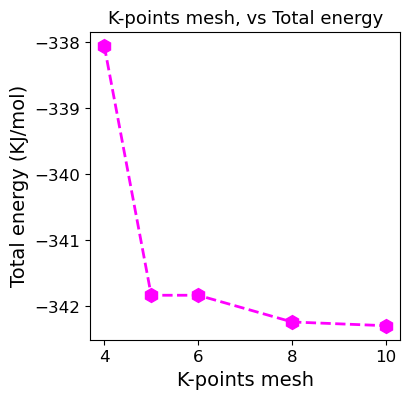

In [64]:
final_e = [-3.50349405*96.491566, -3.54266076*96.491566, -3.54266076*96.491566, -3.54685410*96.491566, -3.54744399*96.491566]

k_points = [4,5,6,8,10]

fig, (ax) = plt.subplots(figsize=(4,4))

ax.plot(k_points,final_e, color='magenta', ls='--', lw=2, markersize=10, marker='h')
ax.set_xlabel('K-points mesh', fontsize = 14)
ax.set_ylabel('Total energy (KJ/mol)', fontsize = 14)
ax.tick_params(labelsize=12)
ax.set_title('K-points mesh, vs Total energy', fontsize=13)

plt.savefig('kp.png')

# relative energy between delta and gamma

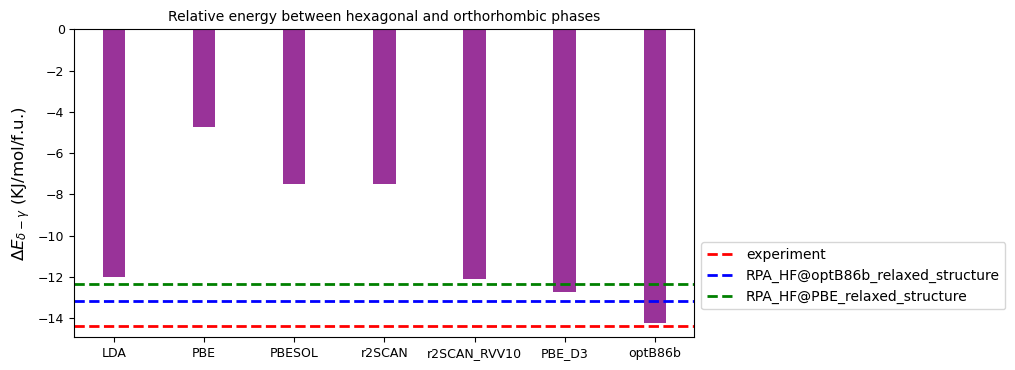

In [6]:
name = ['LDA', 'PBE', 'PBESOL', 'r2SCAN', 'r2SCAN_RVV10', 'PBE_D3', 'optB86b']

final_gamma_delta = [(65.07439064 - 65.57145986)*96.491566/4, 
                     (56.72030774 - 56.91759026)*96.491566/4, \
                     (60.79387215 - 61.10493712)*96.491566/4, \
                     (644.00896805 - 644.32015158)*96.491566/4, \
                     (638.22184174 - 638.72289283)*96.491566/4, \
                     (61.69465655 - 62.22204117)*96.491566/4, \
                     (12.78607759 - 13.37563823)*96.491566/4]

fig, (ax) = plt.subplots(figsize=(8,4))

ax.bar(name,final_gamma_delta, color='purple', width = 0.25, alpha=0.8)
plt.axhline(y = -14.4, color = 'r', linestyle = '--', lw=2, label='experiment')
#plt.axhline(y = -15.1, color = 'k', linestyle = '--', lw=1)
#plt.axhline(y = -13.7, color = 'k', linestyle = '--', lw=1)

plt.axhline(y = (333.12892725-333.67466505)*96.491566/4, color = 'b', linestyle = '--', lw=2, label='RPA_HF@optB86b_relaxed_structure')
plt.axhline(y = (332.77932369-333.29082568)*96.491566/4, color = 'g', linestyle = '--', lw=2, label='RPA_HF@PBE_relaxed_structure')
#plt.axhline(y = (332.90154074-333.68606579)*96.491566/4, color = 'k', linestyle = '--', lw=2, label='RPA_HF@exp_structures')

ax.set_ylabel('$\Delta E_{\delta-\gamma}$ (KJ/mol/f.u.)', fontsize = 12)
ax.set_title('Relative energy between hexagonal and orthorhombic phases', fontsize=10)
ax.tick_params(labelsize=9)

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.2))

#plt.savefig('relative_energy_delta_ortho.png')

# relative energy between delta and tetragonal

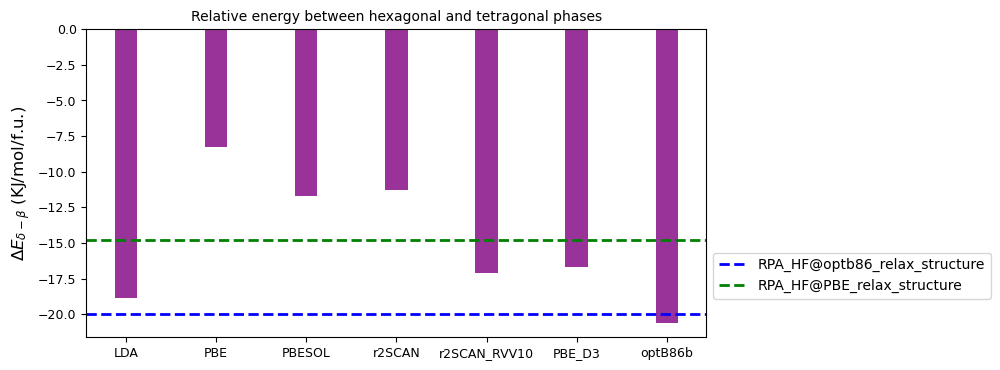

In [10]:
name = ['LDA', 'PBE', 'PBESOL', 'r2SCAN', 'r2SCAN_RVV10', 'PBE_D3', 'optB86b']


final_tetra_delta = [(64.78845861-65.57145986)*96.491566/4,
                     (56.57425576-56.91759026)*96.491566/4, \
                     (60.61986445-61.10493712)*96.491566/4, \
                     (643.85245352-644.32015158)*96.491566/4, \
                     (638.01226069-638.72289283)*96.491566/4, \
                     (61.53159823-62.22204117)*96.491566/4, \
                     (12.52193933-13.37563823)*96.491566/4]

fig, (ax) = plt.subplots(figsize=(8,4))

ax.bar(name,final_tetra_delta, color='purple', width = 0.25, alpha=0.8)

plt.axhline(y = (332.84671640-333.67466505)*96.491566/4, color = 'b', linestyle = '--', lw=2, label='RPA_HF@optb86_relax_structure')
plt.axhline(y = (332.67866303-333.29082568)*96.491566/4, color = 'g', linestyle = '--', lw=2, label='RPA_HF@PBE_relax_structure')

ax.set_ylabel('$\Delta E_{\delta - \\beta}$ (KJ/mol/f.u.)', fontsize = 12)
ax.set_title('Relative energy between hexagonal and tetragonal phases', fontsize=10)
ax.tick_params(labelsize=9)

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.2))

#plt.savefig('relative_energy_delta_tetra.png')

# relative energy between delta and cubic

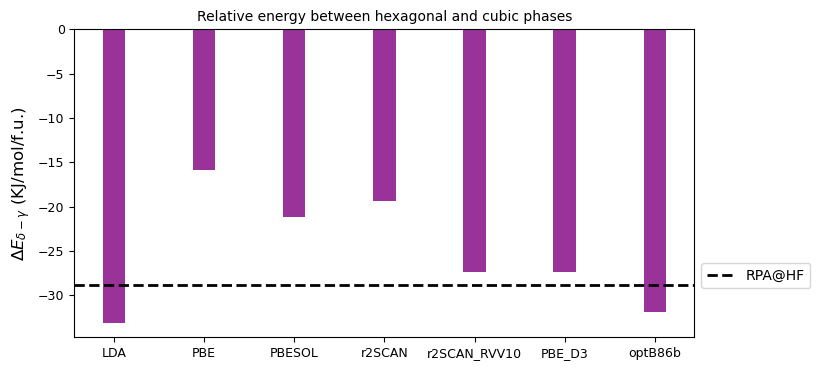

In [13]:
name = ['LDA', 'PBE', 'PBESOL', 'r2SCAN', 'r2SCAN_RVV10', 'PBE_D3', 'optB86b']


final_cubic_delta = [(64.20073426-65.57145986)*96.491566/4, 
                     (56.25959565-56.91759026)*96.491566/4, \
                     (60.22900901-61.10493712)*96.491566/4, \
                     (643.51816345-644.32015158)*96.491566/4, \
                     (637.58837030-638.72289283)*96.491566/4, \
                     (61.08882819-62.22204117)*96.491566/4, \
                     (12.05534908-13.37563823)*96.491566/4]

fig, (ax) = plt.subplots(figsize=(8,4))

ax.bar(name,final_cubic_delta, color='purple', width = 0.25, alpha=0.8)

#plt.axhline(y = (332.52419812-333.67466505)*96.491566/4, color = 'b', linestyle = '--', lw=2, label='RPA@optB86b')
#plt.axhline(y =(332.23421324-333.29082568)*96.491566/4 , color = 'g', linestyle = '--', lw=2, label='RPA@PBE')
plt.axhline(y = (332.48900244- 333.68606579)*96.491566/4, color = 'k', linestyle = '--', lw=2, label='RPA@HF')

ax.set_ylabel('$\Delta E_{\delta - \gamma}$ (KJ/mol/f.u.)', fontsize = 12)
ax.set_title('Relative energy between hexagonal and cubic phases', fontsize=10)
ax.tick_params(labelsize=9)

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.2))

#plt.savefig('relative_energy_delta_cubic.png')

# relative energy between hexagonal phase and orthorhombic phase

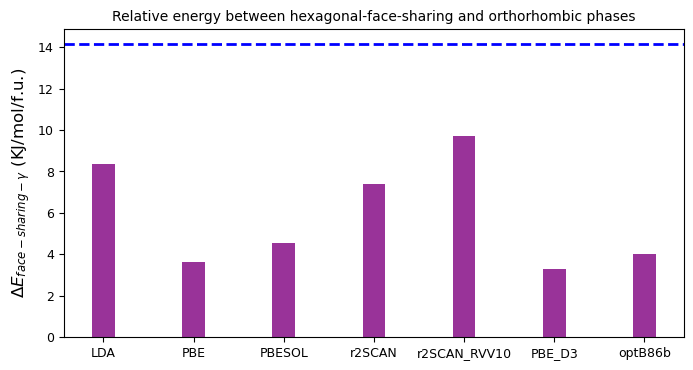

In [3]:
name = ['LDA', 'PBE', 'PBESOL', 'r2SCAN', 'r2SCAN_RVV10', 'PBE_D3', 'optB86b']

final_gamma_delta = [(65.07439064 -64.72850777)*96.491566/4, 
                     (56.72030774 -56.56873859)*96.491566/4, \
                     (60.79387215 -60.60510321)*96.491566/4, \
                     (644.00896805 -643.70329404)*96.491566/4, \
                     (638.22184174 -637.82013730)*96.491566/4, \
                     (61.69465655 -61.55872919)*96.491566/4, \
                     (12.78607759 -12.62048041)*96.491566/4]

fig, (ax) = plt.subplots(figsize=(8,4))

ax.bar(name,final_gamma_delta, color='purple', width = 0.25, alpha=0.8)

plt.axhline(y = (333.12892725-332.54216715)*96.491566/4, color = 'b', linestyle = '--', lw=2, label='RPA@HF')


ax.set_ylabel('$\Delta E_{face-sharing -\gamma}$ (KJ/mol/f.u.)', fontsize = 12)
ax.set_title('Relative energy between hexagonal-face-sharing and orthorhombic phases', fontsize=10)
ax.tick_params(labelsize=9)

#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.2))

#plt.savefig('relative_energy_hexagonal_ortho.png')

# K-points vs relative energies

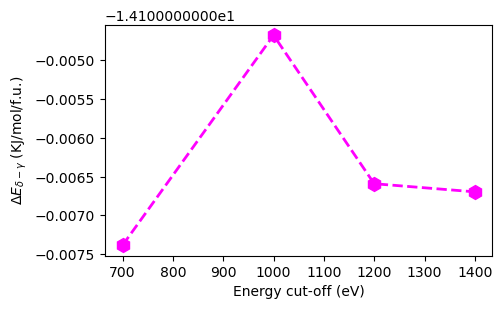

In [68]:
final_e = [(-15.48797090 + 14.90315775)*96.491566/4, \
           (-15.48770692 + 14.90300606)*96.491566/4, \
           (-15.48892371 + 14.90414345)*96.491566/4, \
           (-15.48921575 + 14.90443114)*96.491566/4 ]
energy_cutoff = [700, 1000, 1200, 1400]

fig, (ax) = plt.subplots(figsize=(5,3))

ax.plot(energy_cutoff,final_e, color='magenta', ls='--', lw=2, markersize=10, marker='h')
ax.set_xlabel('Energy cut-off (eV)', fontsize = 10)
ax.set_ylabel('$\Delta E_{\delta-\gamma}$ (KJ/mol/f.u.)', fontsize = 10)
ax.tick_params(labelsize=10)
plt.savefig('kp_energy.png')

# Lattice constants

# A(a)

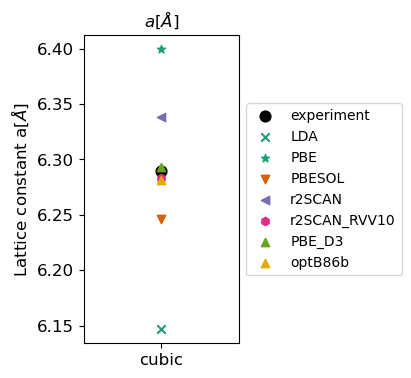

In [113]:
color = ['k','#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02', '#756bb1']
name = ['cubic', 'tetragonal', 'orthorhombic', 'hexagonal']
experiments =  [ 6.2894, 8.82690, 8.8561, 10.4342]
LDA =          [ 6.146660, 8.4303758, 8.954106, 10.159746]
PBE =          [ 6.399354, 8.8466444, 9.126874, 10.852635]
PBESOL =       [ 6.246568, 8.6098156, 8.959170, 10.394264]
r2SCAN =       [ 6.338471, 8.75489, 9.045442, 10.662793]
r2SCAN_RVV10 = [ 6.283513, 8.66078, 9.058704, 10.477776] 
PBE_D3 =       [ 6.293247, 8.65962, 9.024770, 10.456538]
optB86b =      [ 6.2815595, 8.646043,  9.084961, 10.420323]

fig, (ax) = plt.subplots(figsize=(2,4))

ax.scatter(name[0], experiments[0], label = 'experiment', color = color[0], marker = 'o', s=60)
ax.scatter(name[0], LDA[0], label = 'LDA', color = color[1], marker = 'x')
ax.scatter(name[0], PBE[0], label = 'PBE', color = color[1], marker = '*')
ax.scatter(name[0], PBESOL[0], label = 'PBESOL', color = color[2], marker = 'v')
ax.scatter(name[0], r2SCAN[0], label = 'r2SCAN', color = color[3], marker = '<')
ax.scatter(name[0], r2SCAN_RVV10[0], label = 'r2SCAN_RVV10', color = color[4], marker = 'h')
ax.scatter(name[0], PBE_D3[0], label = 'PBE_D3', color = color[5], marker = '^')
ax.scatter(name[0], optB86b[0], label = 'optB86b', color = color[6], marker = '^')

ax.set_ylabel('Lattice constant a[$\AA$]', fontsize = 12)
ax.tick_params(labelsize=12)
ax.set_title(r'$a[\AA]$', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.savefig('cubic-a.png')

Text(0.5, 1.0, '$a[\\AA]$')

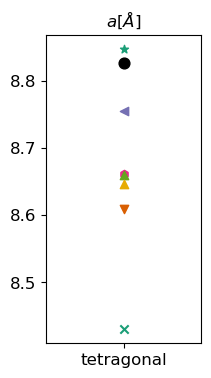

In [114]:
color = ['k','#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02', '#756bb1']
name = ['cubic', 'tetragonal', 'orthorhombic', 'hexagonal']

experiments =  [ 6.2894, 8.82690, 8.8561, 10.4342]
LDA =          [ 6.146660, 8.4303758, 8.954106, 10.159746]
PBE =          [ 6.399354, 8.8466444, 9.126874, 10.852635]
PBESOL =       [ 6.246568, 8.6098156, 8.959170, 10.394264]
r2SCAN =       [ 6.338471, 8.75489, 9.045442, 10.662793]
r2SCAN_RVV10 = [ 6.283513, 8.66078, 9.058704, 10.477776] 
PBE_D3 =       [ 6.293247, 8.65962, 9.024770, 10.456538]
optB86b =      [ 6.2815595, 8.646043,  9.084961, 10.420323]


fig, (ax) = plt.subplots(figsize=(2,4))

ax.scatter(name[1], experiments[1], label = 'experiment', color = color[0], marker = 'o', s=60)
ax.scatter(name[1], LDA[1], label = 'LDA', color = color[1], marker = 'x')
ax.scatter(name[1], PBE[1], label = 'PBE', color = color[1], marker = '*')
ax.scatter(name[1], PBESOL[1], label = 'PBESOL', color = color[2], marker = 'v')
ax.scatter(name[1], r2SCAN[1], label = 'r2SCAN', color = color[3], marker = '<')
ax.scatter(name[1], r2SCAN_RVV10[1], label = 'r2SCAN_RVV10', color = color[4], marker = 'h')
ax.scatter(name[1], PBE_D3[1], label = 'PBE_D3', color = color[5], marker = '^')
ax.scatter(name[1], optB86b[1], label = 'optB86b', color = color[6], marker = '^')

#ax.set_ylabel('Lattice constant a[$\AA$]', fontsize = 12)
ax.tick_params(labelsize=12)
ax.set_title(r'$a[\AA]$', fontsize=12)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.savefig('cubic-a.png')

Text(0.5, 1.0, '$a[\\AA]$')

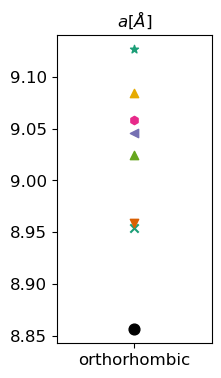

In [115]:
color = ['k','#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02', '#756bb1']
name = ['cubic', 'tetragonal', 'orthorhombic', 'hexagonal']

experiments =  [ 6.2894, 8.82690, 8.8561, 10.4342]
LDA =          [ 6.146660, 8.4303758, 8.954106, 10.159746]
PBE =          [ 6.399354, 8.8466444, 9.126874, 10.852635]
PBESOL =       [ 6.246568, 8.6098156, 8.959170, 10.394264]
r2SCAN =       [ 6.338471, 8.75489, 9.045442, 10.662793]
r2SCAN_RVV10 = [ 6.283513, 8.66078, 9.058704, 10.477776] 
PBE_D3 =       [ 6.293247, 8.65962, 9.024770, 10.456538]
optB86b =      [ 6.2815595, 8.646043,  9.084961, 10.420323]

fig, (ax) = plt.subplots(figsize=(2,4))

ax.scatter(name[2], experiments[2], label = 'experiment', color = color[0], marker = 'o', s=60)
ax.scatter(name[2], LDA[2], label = 'LDA', color = color[1], marker = 'x')
ax.scatter(name[2], PBE[2], label = 'PBE', color = color[1], marker = '*')
ax.scatter(name[2], PBESOL[2], label = 'PBESOL', color = color[2], marker = 'v')
ax.scatter(name[2], r2SCAN[2], label = 'r2SCAN', color = color[3], marker = '<')
ax.scatter(name[2], r2SCAN_RVV10[2], label = 'r2SCAN_RVV10', color = color[4], marker = 'h')
ax.scatter(name[2], PBE_D3[2], label = 'PBE_D3', color = color[5], marker = '^')
ax.scatter(name[2], optB86b[2], label = 'optB86b', color = color[6], marker = '^')

#ax.set_ylabel('Lattice constant a[$\AA$]', fontsize = 12)
ax.tick_params(labelsize=12)
ax.set_title(r'$a[\AA]$', fontsize=12)

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.savefig('cubic-a.png')

Text(0.5, 1.0, '$a[\\AA]$')

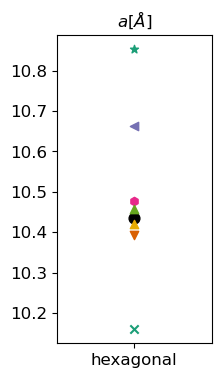

In [116]:
color = ['k','#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02', '#756bb1']
name = ['cubic', 'tetragonal', 'orthorhombic', 'hexagonal']
experiments =  [ 6.2894, 8.82690, 8.8561, 10.4342]
LDA =          [ 6.146660, 8.4303758, 8.954106, 10.159746]
PBE =          [ 6.399354, 8.8466444, 9.126874, 10.852635]
PBESOL =       [ 6.246568, 8.6098156, 8.959170, 10.394264]
r2SCAN =       [ 6.338471, 8.75489, 9.045442, 10.662793]
r2SCAN_RVV10 = [ 6.283513, 8.66078, 9.058704, 10.477776] 
PBE_D3 =       [ 6.293247, 8.65962, 9.024770, 10.456538]
optB86b =      [ 6.2815595, 8.646043,  9.084961, 10.420323]

fig, (ax) = plt.subplots(figsize=(2,4))

ax.scatter(name[3], experiments[3], label = 'experiment', color = color[0], marker = 'o', s=60)
ax.scatter(name[3], LDA[3], label = 'LDA', color = color[1], marker = 'x')
ax.scatter(name[3], PBE[3], label = 'PBE', color = color[1], marker = '*')
ax.scatter(name[3], PBESOL[3], label = 'PBESOL', color = color[2], marker = 'v')
ax.scatter(name[3], r2SCAN[3], label = 'r2SCAN', color = color[3], marker = '<')
ax.scatter(name[3], r2SCAN_RVV10[3], label = 'r2SCAN_RVV10', color = color[4], marker = 'h')
ax.scatter(name[3], PBE_D3[3], label = 'PBE_D3', color = color[5], marker = '^')
ax.scatter(name[3], optB86b[3], label = 'optB86b', color = color[6], marker = '^')

#ax.set_ylabel('Lattice constant a[$\AA$]', fontsize = 12)
ax.tick_params(labelsize=12)

ax.set_title(r'$a[\AA]$', fontsize=12)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.savefig('cubic-a.png')

# C(c)

Text(0.5, 1.0, '$c[\\AA]$')

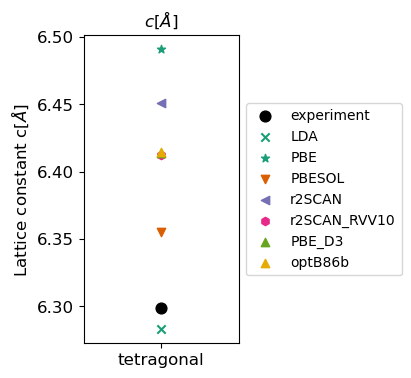

In [106]:
color = ['k','#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02', '#756bb1']
name = ['cubic', 'tetragonal', 'orthorhombic', 'hexagonal']
experiments =  [ 6.2894, 6.29902,  12.4722, 17.761]
LDA =          [ 6.1466610, 6.2830458, 12.200399, 17.279312]
PBE =          [ 6.3993531, 6.4908438, 12.667594, 18.241273]
PBESOL =       [ 6.2465682, 6.3553377, 12.382041, 17.692544]
r2SCAN =       [ 6.3384716, 6.45114,   12.578016, 18.058348]
r2SCAN_RVV10 = [ 6.2835143, 6.412251,  12.485524, 17.785168] 
PBE_D3 =       [ 6.2932463, 6.4137443, 12.509329, 17.829310]
optB86b =      [ 6.2815597, 6.4147369, 12.477545, 17.752914]

fig, (ax) = plt.subplots(figsize=(2,4))

ax.scatter(name[1], experiments[1], label = 'experiment', color = color[0], marker = 'o', s=60)
ax.scatter(name[1], LDA[1], label = 'LDA', color = color[1], marker = 'x')
ax.scatter(name[1], PBE[1], label = 'PBE', color = color[1], marker = '*')
ax.scatter(name[1], PBESOL[1], label = 'PBESOL', color = color[2], marker = 'v')
ax.scatter(name[1], r2SCAN[1], label = 'r2SCAN', color = color[3], marker = '<')
ax.scatter(name[1], r2SCAN_RVV10[1], label = 'r2SCAN_RVV10', color = color[4], marker = 'h')
ax.scatter(name[1], PBE_D3[1], label = 'PBE_D3', color = color[5], marker = '^')
ax.scatter(name[1], optB86b[1], label = 'optB86b', color = color[6], marker = '^')


ax.set_ylabel('Lattice constant c[$\AA$]', fontsize = 12)
ax.tick_params(labelsize=12)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title(r'$c[\AA]$', fontsize=12)
#plt.savefig('lattice.png')

Text(0.5, 1.0, '$c[\\AA]$')

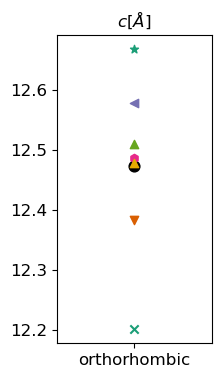

In [104]:
color = ['k','#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02', '#756bb1']
name = ['cubic', 'tetragonal', 'orthorhombic', 'hexagonal']
experiments =  [ 6.2894, 6.29902,  12.4722, 17.761]
LDA =          [ 6.1466610, 6.2830458, 12.200399, 17.279312]
PBE =          [ 6.3993531, 6.4908438, 12.667594, 18.241273]
PBESOL =       [ 6.2465682, 6.3553377, 12.382041, 17.692544]
r2SCAN =       [ 6.3384716, 6.45114,   12.578016, 18.058348]
r2SCAN_RVV10 = [ 6.2835143, 6.412251,  12.485524, 17.785168] 
PBE_D3 =       [ 6.2932463, 6.4137443, 12.509329, 17.829310]
optB86b =      [ 6.2815597, 6.4147369, 12.477545, 17.752914]

fig, (ax) = plt.subplots(figsize=(2,4))

ax.scatter(name[2], experiments[2], label = 'experiment', color = color[0], marker = 'o', s=60)
ax.scatter(name[2], LDA[2], label = 'LDA', color = color[1], marker = 'x')
ax.scatter(name[2], PBE[2], label = 'PBE', color = color[1], marker = '*')
ax.scatter(name[2], PBESOL[2], label = 'PBESOL', color = color[2], marker = 'v')
ax.scatter(name[2], r2SCAN[2], label = 'r2SCAN', color = color[3], marker = '<')
ax.scatter(name[2], r2SCAN_RVV10[2], label = 'r2SCAN_RVV10', color = color[4], marker = 'h')
ax.scatter(name[2], PBE_D3[2], label = 'PBE_D3', color = color[5], marker = '^')
ax.scatter(name[2], optB86b[2], label = 'optB86b', color = color[6], marker = '^')


#ax.set_ylabel('Lattice constant c[$\AA$]', fontsize = 12)
ax.tick_params(labelsize=12)
ax.set_title(r'$c[\AA]$', fontsize=12)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


Text(0.5, 1.0, '$c[\\AA]$')

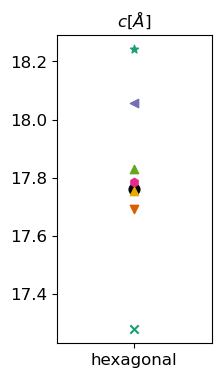

In [103]:
color = ['k','#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02', '#756bb1']
name = ['cubic', 'tetragonal', 'orthorhombic', 'hexagonal']
experiments =  [ 6.2894, 6.29902,  12.4722, 17.761]
LDA =          [ 6.1466610, 6.2830458, 12.200399, 17.279312]
PBE =          [ 6.3993531, 6.4908438, 12.667594, 18.241273]
PBESOL =       [ 6.2465682, 6.3553377, 12.382041, 17.692544]
r2SCAN =       [ 6.3384716, 6.45114,   12.578016, 18.058348]
r2SCAN_RVV10 = [ 6.2835143, 6.412251,  12.485524, 17.785168] 
PBE_D3 =       [ 6.2932463, 6.4137443, 12.509329, 17.829310]
optB86b =      [ 6.2815597, 6.4147369, 12.477545, 17.752914]

fig, (ax) = plt.subplots(figsize=(2,4))

ax.scatter(name[3], experiments[3], label = 'experiment', color = color[0], marker = 'o', s=60)
ax.scatter(name[3], LDA[3], label = 'LDA', color = color[1], marker = 'x')
ax.scatter(name[3], PBE[3], label = 'PBE', color = color[1], marker = '*')
ax.scatter(name[3], PBESOL[3], label = 'PBESOL', color = color[2], marker = 'v')
ax.scatter(name[3], r2SCAN[3], label = 'r2SCAN', color = color[3], marker = '<')
ax.scatter(name[3], r2SCAN_RVV10[3], label = 'r2SCAN_RVV10', color = color[4], marker = 'h')
ax.scatter(name[3], PBE_D3[3], label = 'PBE_D3', color = color[5], marker = '^')
ax.scatter(name[3], optB86b[3], label = 'optB86b', color = color[6], marker = '^')


#ax.set_ylabel('Lattice constant c[$\AA$]', fontsize = 12)
ax.tick_params(labelsize=12)
ax.set_title(r'$c[\AA]$', fontsize=12)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
